Sevtion 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("segmentData.csv")
data

,cid,age,school,sex,items,dollars,segment
0,1,48,14,male,3,14,8
1,2,26,10,female,1,7,1
2,3,23,16,male,2,16,2
3,4,32,18,female,7,81,3
4,5,55,16,male,4,58,4
...,...,...,...,...,...,...,...
799995,799996,37,17,female,10,75,3
799996,799997,55,16,female,5,61,4
799997,799998,67,14,male,3,5,5
799998,799999,34,13,male,2,8,6


In [13]:
'''
1. Describe the centroids of the 8 segments by creating a table of the mean of each variable for the
segment. Sex will need to be recoded.
'''
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
centroids = data.groupby('segment').mean().reset_index()
# Recode Sex if needed
# centroids['sex'] = centroids['sex'].map({1: 'male', 2: 'female'})
print(centroids)

   segment       cid       age    school      sex    items   dollars
0        1  399998.0  22.66828  10.44376  0.49497  1.36501   6.79798
1        2  399999.0  24.05608  15.80716  0.49496  1.80906  15.51609
2        3  400000.0  34.50573  17.81266  0.49567  8.50312  74.49335
3        4  400001.0  54.49724  16.36582  0.49420  5.49679  61.50463
4        5  400002.0  71.86368  13.49566  0.74764  2.55861   8.68422
5        6  400003.0  34.50223  13.44966  0.49552  2.55283   9.57435
6        7  400004.0  44.54140  15.52418  0.24221  1.81227  36.50430
7        8  399997.0  45.50983  13.50443  0.49291  2.56042  11.51952


In [20]:
'''2. Explain differences you see between segments.
a. How do segments 1 & 2 differ?
b. What are the differences between 5 & 7?
'''
var = data.groupby('segment').var().reset_index()

diff_ave12 = centroids.loc[1] - centroids.loc[2]
diff_var12 = var.loc[1] - var.loc[2]
print("Differences of average between segments 1 & 2:")
print(diff_ave12)
print("Differences of variance between segments 1 & 2:")
print(diff_var12)

# b
diff_ave57 = centroids.loc[5] - centroids.loc[7]
diff_var57 = var.loc[5] - var.loc[7]
print("\nDifferences of average between segments 5 & 7:")
print(diff_ave57)
print("Differences of variance between segments 5 & 7:")
print(diff_var57)

Differences of average between segments 1 & 2:
segment    -1.00000
cid        -1.00000
age       -10.44965
school     -2.00550
sex        -0.00071
items      -6.69406
dollars   -58.97726
dtype: float64
Differences of variance between segments 1 & 2:
segment   -1.000000
cid        0.000000
age        2.531073
school    -0.016011
sex       -0.000007
items     -0.431093
dollars   -9.227007
dtype: float64

Differences of average between segments 5 & 7:
segment    -2.00000
cid         6.00000
age       -11.00760
school     -0.05477
sex         0.00261
items      -0.00759
dollars    -1.94517
dtype: float64
Differences of variance between segments 5 & 7:
segment   -2.000000
cid        0.000000
age       -8.009048
school    -0.158976
sex        0.000030
items     -0.017741
dollars   -0.469312
dtype: float64


In [21]:
'''. If you were going to create an advertising campaign to target Millennials (born between 1981 –
1996) who weren’t buying many items, which segment would you focus on?
'''
millennials = data[(data['age'] >= 27) & (data['age'] <= 42)]
low_buying_millennials = millennials[millennials['items'] < millennials['items'].mean()]
target_segment = low_buying_millennials['segment'].mode().values[0]
print("Segment to focus on for advertising campaign:", target_segment)

Segment to focus on for advertising campaign: 6


Section 2

In [19]:
'''1. Compute the gain, cumulative gain, lift, and cumulative lift for each segment. Don’t forget to
sort to compute the cumulative statistics. Use the following formulas.
'''
df = data.groupby('segment')['dollars'].sum().reset_index()
data_sorted = df.sort_values(by='dollars', ascending=False)
data_sorted['Gain'] = (data_sorted['dollars'] / data_sorted['dollars'].sum())*100
data_sorted['Cumulative Gain'] = df_sorted['Gain'].cumsum()
data_sorted['Lift'] = ((data_sorted['dollars'] / data_sorted['dollars'].mean()) - 1) * 100
data_sorted['Expected'] = data_sorted['dollars'].mean()
data_sorted['Cumulative Lift'] = ((data_sorted['dollars'].cumsum() - df_sorted['Expected'].cumsum())/data_sorted['Expected'].cumsum())*100
data_sorted.reset_index().drop('index', axis = 1)

,segment,dollars,Gain,Cumulative Gain,Lift,Expected,Cumulative Lift
0,3,7449335,33.167940,33.167940,165.343523,2807430.5,165.343523
1,4,6150463,27.384752,60.552692,119.078015,2807430.5,142.210769
2,7,3650430,16.253430,76.806122,30.027440,2807430.5,104.816326
3,2,1551609,6.908492,83.714615,-44.732060,2807430.5,67.429229
4,8,1151952,5.129032,88.843646,-58.967746,2807430.5,42.149834
5,6,957435,4.262951,93.106597,-65.896395,2807430.5,24.142129
6,5,868422,3.866623,96.973220,-69.067017,2807430.5,10.826537
7,1,679798,3.026780,100.000000,-75.785759,2807430.5,0.000000


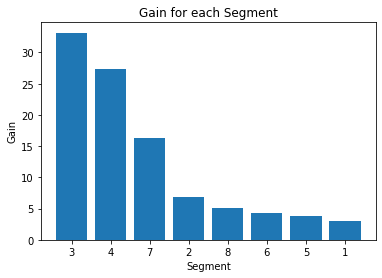

In [22]:
'''2.a. Plot the gain as a bar chart.'''
segment = [str(i+1) for i in list(df_sorted.index)]
plt.bar(segment, data_sorted['Gain'])
plt.xlabel('Segment')
plt.ylabel('Gain')
plt.title('Gain for each Segment')
plt.show()


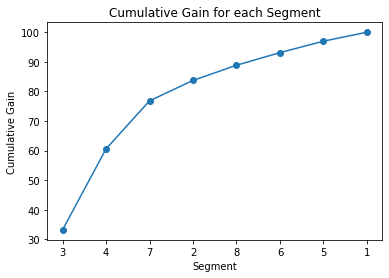

In [26]:
'''2.b. Plot the cumulative gain as a line chart.'''
plt.plot(segment, df_sorted['Cumulative Gain'], marker='o', linestyle='-')
plt.xlabel('Segment')
plt.ylabel('Cumulative Gain')
plt.title('Cumulative Gain for each Segment')
plt.show()


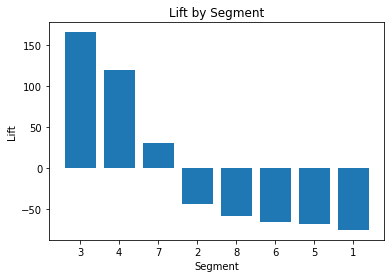

In [27]:
'''3.a. Plot the lift as a bar chart.'''
plt.bar(segment, df_sorted['Lift'])
plt.xlabel('Segment')
plt.ylabel('Lift')
plt.title('Lift for each Segment')
plt.show()

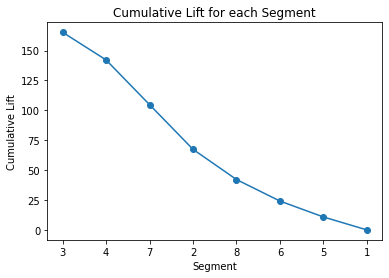

In [28]:
'''3.b. Plot the cumulative lift as a line chart.'''
plt.plot(segment, df_sorted['Cumulative Lift'], marker='o', linestyle='-')
plt.xlabel('Segment')
plt.ylabel('Cumulative Lift')
plt.title('Cumulative Lift for each Segment')
plt.show()